# Non-unique $\alpha\beta$ pairing
## Find how many unique $\alpha$ sequences each $\beta$ chain pairs with and how many unique $\beta$ sequences each $\alpha$ chain pairs with

In [1]:
from __future__ import division
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
cd /Users/kgrigait/Desktop/new_data

/Users/kgrigait/Desktop/new_data


In [3]:
#Load paired alpha beta dataframes.
TRp_1=pd.read_csv('S1/TRpairs_productive.txt', sep='\t')
TRp_2=pd.read_csv('S2/TRpairs_productive.txt', sep='\t')
TRp_3=pd.read_csv('S3/TRpairs_productive.txt', sep='\t')
TRp_4=pd.read_csv('S4/TRpairs_productive.txt', sep='\t')
TRp_5=pd.read_csv('S5/TRpairs_productive.txt', sep='\t')

#Pool all dataframes into one
TRp_all=pd.concat([TRp_1,TRp_2,TRp_3,TRp_4,TRp_5],axis=0)

#Put dataframes in the list for individual subject figures.
TRp_list=[TRp_1,TRp_2,TRp_3,TRp_4,TRp_5]

In [4]:
#For pooled data.
df=TRp_all

#Make a list of unique beta chain clone IDs.
beta_list=df.cloneB.unique().tolist()
#Initiate a dataframe where index is the unique clone IDs of beta chain and column is the number of 
#unique alphas (by clone ID) that beta pairs with.
counts_A=pd.DataFrame(index=beta_list,columns=['alpha_count'])

#Loop over unique beta clone IDs:
for i in range(len(counts_A)):
    #Extract rows containing the beta chains with the particular clone ID.
    #Count how many unique alpha chain clone IDs that rows contain and update the initiated counts_A 
    #dataframe with the count of unique alpha clone IDs.
    counts_A.ix[counts_A.index[i]]=len(df[df.cloneB==counts_A.index[i]].cloneA.unique())

#Make an array of all unique alpha counts    
x_alpha=np.array(counts_A.alpha_count.value_counts().index)
#Make an array of how many times each alpha count is present in the dataframe.
y_alpha=np.array(counts_A.alpha_count.value_counts())

#Do the same for the alpha chain.
alpha_list=df.cloneA.unique().tolist()
counts_B=pd.DataFrame(index=alpha_list,columns=['beta_count'])
for i in range(len(counts_B)):
    counts_B.ix[counts_B.index[i]]=len(df[df.cloneA==counts_B.index[i]].cloneB.unique())
x_beta=np.array(counts_B.beta_count.value_counts().index)
y_beta=np.array(counts_B.beta_count.value_counts())

#Remove count=1 and calculate frequencies of the remaining counts.
x_alpha=x_alpha[y_alpha!=1]
y_alpha_freq=np.divide(y_alpha[y_alpha!=1],np.sum(y_alpha[y_alpha!=1])+0.0)

x_beta=x_beta[y_beta!=1]
y_beta_freq=np.divide(y_beta[y_beta!=1],np.sum(y_beta[y_beta!=1])+0.0)

### Plot Results

#### Figure 2C

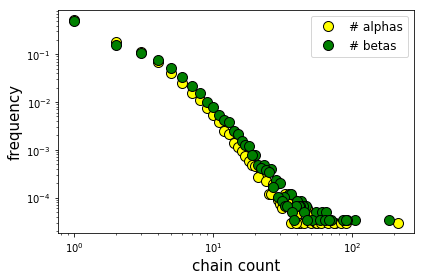

In [11]:
f, ax = plt.subplots()
ax.plot(x_alpha,y_alpha_freq,'o',markersize=10,color='yellow',markeredgecolor='black',label='# alphas')
ax.plot(x_beta,y_beta_freq,'o',markersize=10,color='green',markeredgecolor='black',label='# betas')
ax.legend(loc='upper right',fontsize=12)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('chain count',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.tight_layout()
plt.savefig('unique_chain_count_all.png')

#### Supplementary figure 3

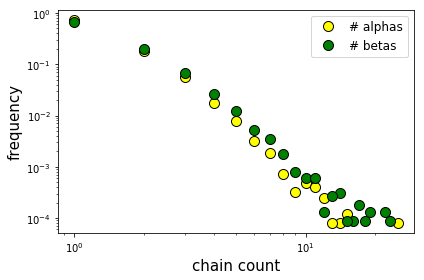

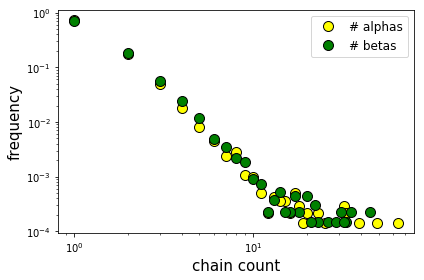

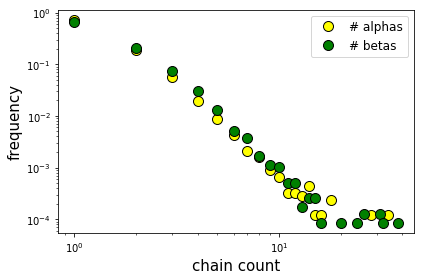

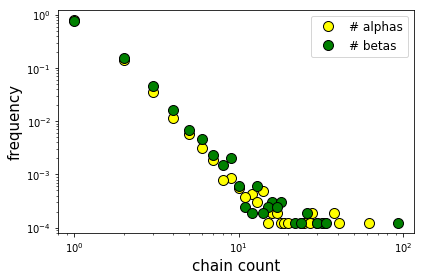

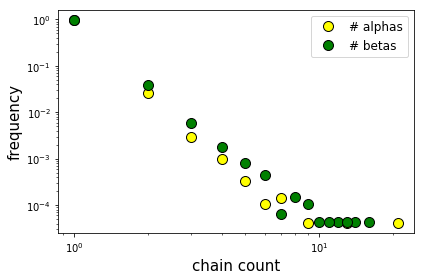

In [17]:
#For individual subjects.
for j in range(5):
    df=TRp_list[j]
    beta_list=df.cloneB.unique().tolist()
    counts_A=pd.DataFrame(index=beta_list,columns=['alpha_count'])
    for i in range(len(counts_A)):
        counts_A.ix[counts_A.index[i]]=len(df[df.cloneB==counts_A.index[i]].cloneA.unique())
    x_alpha=np.array(counts_A.alpha_count.value_counts().index)
    y_alpha=np.array(counts_A.alpha_count.value_counts())

    alpha_list=df.cloneA.unique().tolist()
    counts_B=pd.DataFrame(index=alpha_list,columns=['beta_count'])
    for i in range(len(counts_B)):
        counts_B.ix[counts_B.index[i]]=len(df[df.cloneA==counts_B.index[i]].cloneB.unique())
    x_beta=np.array(counts_B.beta_count.value_counts().index)
    y_beta=np.array(counts_B.beta_count.value_counts())

    x_alpha=x_alpha[y_alpha!=1]
    y_alpha_freq=np.divide(y_alpha[y_alpha!=1],np.sum(y_alpha[y_alpha!=1])+0.0)

    x_beta=x_beta[y_beta!=1]
    y_beta_freq=np.divide(y_beta[y_beta!=1],np.sum(y_beta[y_beta!=1])+0.0)

    f, ax = plt.subplots()
    ax.plot(x_alpha,y_alpha_freq,'o',markersize=10,color='yellow',markeredgecolor='black',label='# alphas')
    ax.plot(x_beta,y_beta_freq,'o',markersize=10,color='green',markeredgecolor='black',label='# betas')
    ax.legend(loc='upper right',fontsize=12)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('chain count',fontsize=15)
    plt.ylabel('frequency',fontsize=15)
    plt.tight_layout()
    plt.savefig('unique_chain_count_'+str(j)+'.png')